## DATA STORY: bikeshare data for Capstone 1

Let's start again with reading in a test file of bikeshare data, Quarter 1 in 2016, and converting the duration from milliseconds to minutes. As a reminder, the data can be found here, https://s3.amazonaws.com/capitalbikeshare-data/index.html.

In [1]:
import pandas as pd
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
bikeshare = pd.read_csv('../Data Wrangling/data/2016-Q1-Trips-History-Data.csv', 
                        parse_dates=True, date_parser=dateparse, index_col='Start date')
bikeshare.columns = ['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype']
bikeshare.head()

,duration,enddate,startlocID,startloc,endlocID,endloc,bikeID,memtype
Start date,,,,,,,,
2016-03-31 23:59:00,301295,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered
2016-03-31 23:59:00,557887,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered
2016-03-31 23:59:00,555944,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered
2016-03-31 23:57:00,766916,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered
2016-03-31 23:57:00,139656,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered


In [2]:
bikeshare.duration = bikeshare.duration * 1.66667e-5

The first step is to start visualizing the data, here is a histogram of duration of bike rentals.

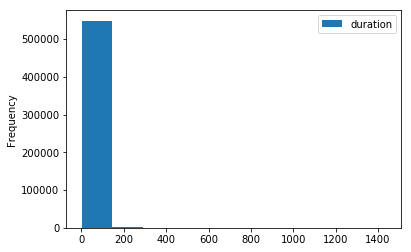

In [3]:
import matplotlib.pyplot as plt
bikeshare.plot(y='duration', kind='hist')
plt.show()

The default choice for number of bins doesn't give us much information.  To 'zoom in' on some of the detail in the distribution, let's increase the number of bins. This gives us a better idea of the distribution. Many of the rides are clustered at the lower tail (i.e. this is a skewed distribution), where rental duration is ~ 8-10 minutes.

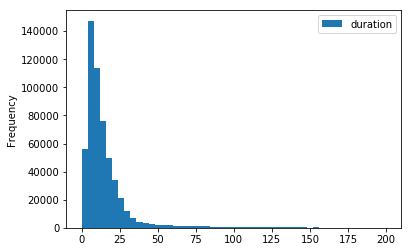

In [4]:
bikeshare.plot(y='duration', kind='hist', bins=50, range=(0,200))
plt.show()

What are the patterns of bike rental duration over the course of two months in the quarter? Let's use February and March as an example. 

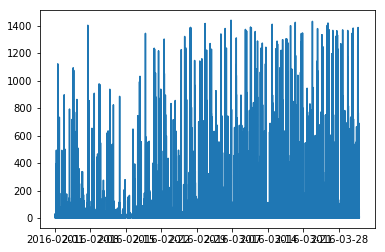

In [11]:
duration = bikeshare['duration']
plt.plot(duration.loc['2016-02':'2016-03'])
plt.show()

There is definitely variation in rental duration over these two months, but it's hard to digest this information.  Let's calculate a weekly moving average to smooth out the chaos for easier interpretation.

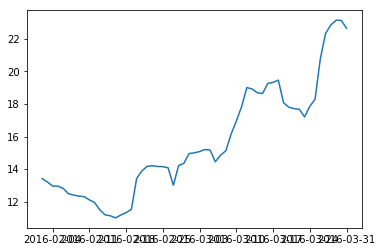

In [18]:
smoothed = duration.resample('D').mean().rolling(window=7).mean()
plt.plot(smoothed.loc['2016-02':'2016-03'])
plt.show()

Yes, there are certainly some trends over time in this short window. Duration of rentals look to be icreasing into the end of March 2016. It would be interesting to followup by looking at other months in 2016, or comparing to the same period in a different year. I'll add these to the "Next Steps", below. 
It is important to note that since we are looking at a weekly moving average, we are loosing some information.  Are there consistent patterns across the days of the week?

In [6]:
bikeshare['startdate'] = bikeshare.index
bikeshare['startweekday'] = bikeshare['startdate'].apply(lambda d: d.weekday())

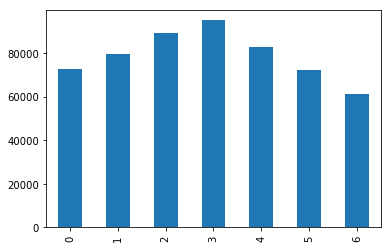

In [7]:
bikeshare['startweekday'].value_counts().sort_index().plot(kind='bar')
plt.show()
#0= Sunday, 6=Saturday

Yes again: Frequency of bike rental seems to peak on Wednesdays (3), and taper off toward Saturday (6). Are there different distributions in bike rentals for registered vs. casual members?

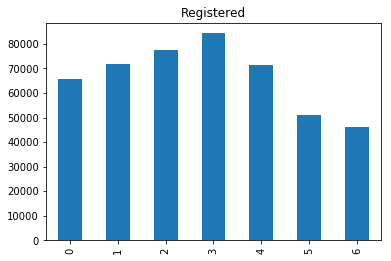

In [14]:
bikeshare['startweekday'][bikeshare['memtype']=='Registered'].value_counts().sort_index().plot(kind='bar', title="Registered")
plt.show()

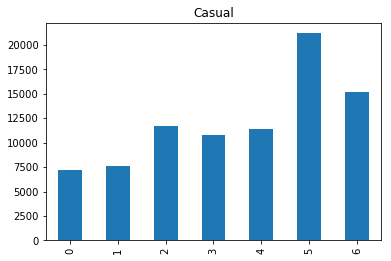

In [13]:
bikeshare['startweekday'][bikeshare['memtype']=='Casual'].value_counts().sort_index().plot(kind='bar', title="Casual")
plt.show()

There are some big differences between frequency of bike rentals in registered and causal users. As one might expect, registered users, who might be residents of DC, or frequent travelers, tend to rent bikes most freqently during the work week.  On the contrary, the heaviest casual use is on Friday and Saturday.

## So, what's the story?

So far, we've learned there is quite a bit of variation in length of bike rental for Capital Bikeshare in Washington, D.C.  

However, it seems there may be some consistent patterns in rentals by day of the week.  

Finally, causal and registered users have different patterns in use through the week.  



## Next steps:

To move this story forward, we can ask some questions, such as:
1. Can we predict user type by the bike ride duration?
2. Can we predict user type by the day of the week?
3. Compare this winter/spring data to summer or fall data - do the answers to the above questions change?